In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [3]:
#import banking data and drop nan, visualize the shape and columns list
data=pd.read_csv('banking.csv')

In [20]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,1,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,2,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,3,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,4,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,1,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,4,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,1,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,3,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,5,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [16]:
# visualize unique values in education col
data['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [15]:
# convert "basic.4y", "basic.9y" and "basic.6y" into "basic" only.
data['education']=data['education'].replace(["basic.4y", "basic.9y","basic.6y"],'basic')

After grouping, this is the columns

In [19]:
# visualize unique values in education col
data['education'].unique()

array([1, 2, 3, 4, 5, 0], dtype=int64)

In [18]:
#convert education variable into numerical one
data['education']=data['education'].map({'illiterate':0 ,'basic': 1,'high.school': 4,'professional.course': 5,'university.degree': 3,'unknown': 2})

### Data exploration

In [35]:
# count the unique values of target variable
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

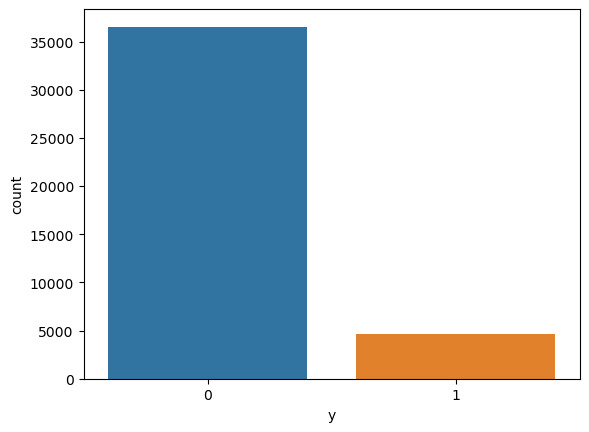

In [43]:
# Countplot shows the counts of observations in each categorical bin using bars, sns.countplot
sns.countplot(data,x='y')

There are 36548 no's and 4640 yes's in the outcome variables.

### Feature Selection

In [46]:
from sklearn import datasets
# perform features selection
numerical_columns = data.select_dtypes(include=np.number)
numerical_columns

,age,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,2,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,3,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,1,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,4,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,1,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,3,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,5,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0


The features selection helps to improve the prediction of machine learning model



In [54]:
#prepare data frame for taining
X=numerical_columns.drop(columns=['y'])
Y=numerical_columns['y']

### Logistic Regression Model Fitting

In [55]:
from sklearn import datasets
# perform features selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\MOEED\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [64]:
lr.score(X_test, y_test)

0.9056809905316825

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [66]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


#### Predicting the test set results and caculating the accuracy

In [1]:
# predict on testdata
# predict on testdata
ypred = lr.predict(X_test)
ypred

### Confusion Matrix

In [68]:
#plot confusion matrix
#plot confusion matrix
cm = confusion_matrix(y_test, ypred)
cm

array([[7072,  223],
       [ 554,  389]], dtype=int64)

<Axes: >

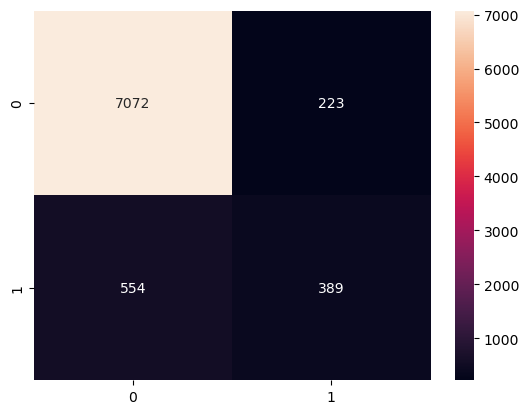

In [69]:
sns.heatmap(cm, annot = True, fmt = 'd')

The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.